In [27]:
# Auto-reload setup
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath("../src"))
from plotting_price_drivers import *

In [29]:
filepath = '../data/clean/exploitable/merged_data.csv'
save_path = None
df = pd.read_csv(filepath, parse_dates=['Date'])

Nuclear


/Users/gonot/Desktop/Energy project/epex-spot-analysis/src/plotting_price_drivers.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


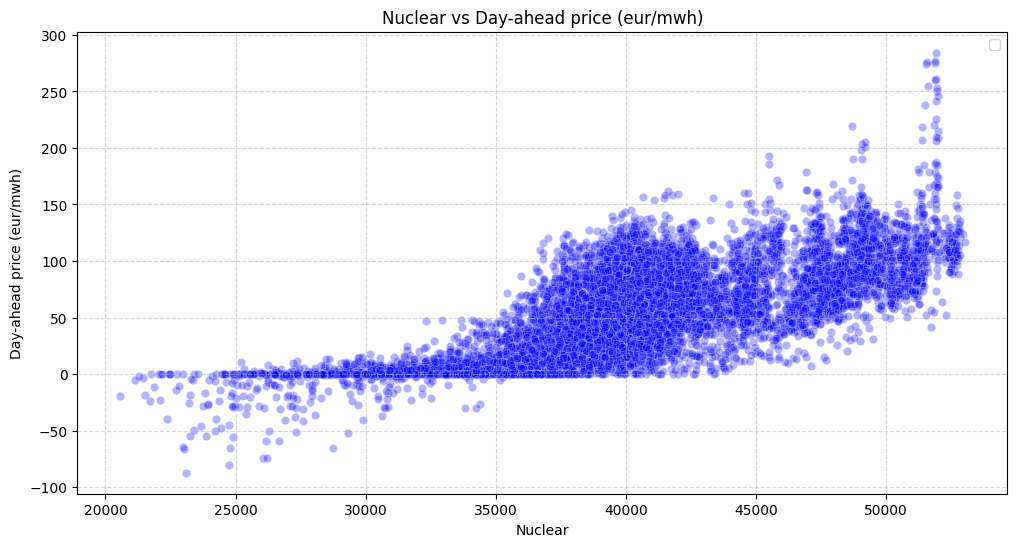

In [30]:
plot_scatter_price_driver(df, '2024', '2025', 'Nuclear')

['Total Load', 'Nuclear', 'Solar', 'Wind Offshore', 'Wind Onshore']
Total Load
Nuclear
Solar
Wind Offshore
Wind Onshore
TEST


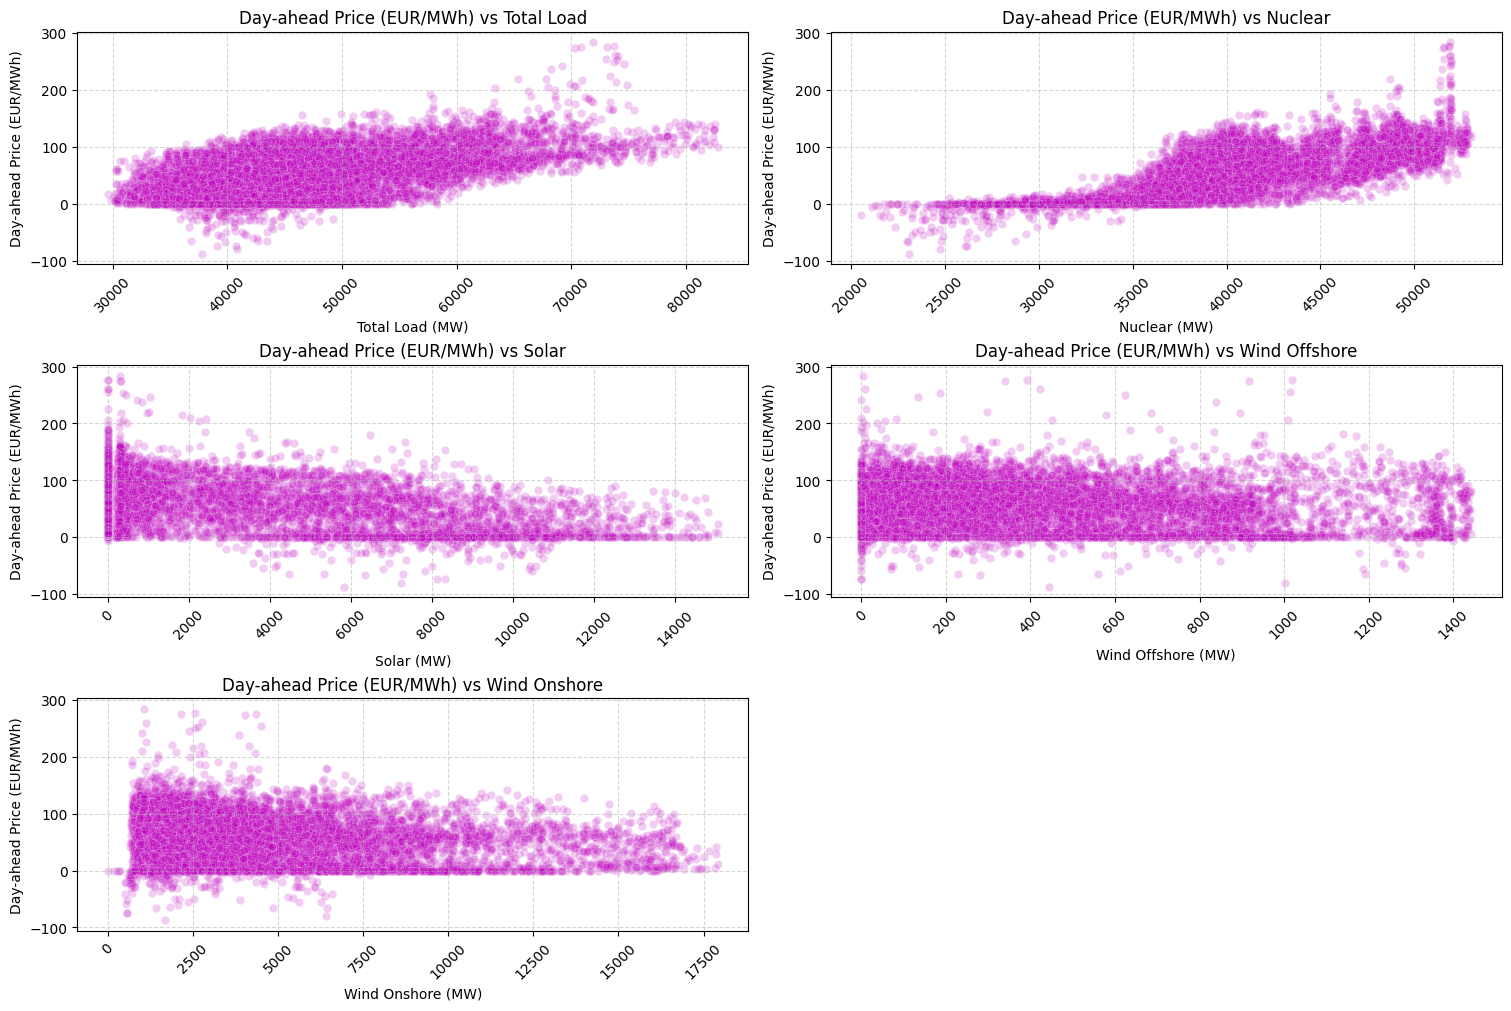

In [31]:
drivers = extract_drivers_list(df)
# drivers = ['Solar']
print(drivers)
# multiple_plot_scatter_price_driver1(df, drivers, n_cols=1, figsize=(12,6))
multiple_plot_scatter_price_driver1(df,'2024', '2025', drivers)

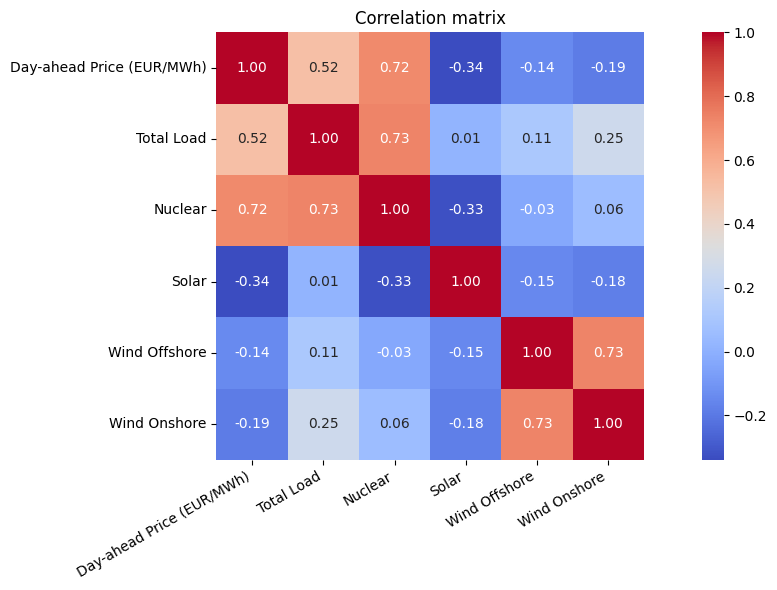

In [33]:
drivers = extract_drivers_list(df, non_driver='Date')
plot_correlation_matrix(df, drivers, '2024', '2025')